In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df= pd.read_csv("Code_Dataset.csv")

column_name= {"Number" : "Paper", "Type" : "Type", "Sheet Thickness (t) (mm)" : "Thickness", "Strain Hardening (n)" : "Hardening_Exp",
               "Anisotropy Value (r)" : "Anisotropy", "YS(N/mm2)" : "Yield_Strength", "UTS(N/mm2)" : "Ultimate_Strength", "Total tensile Strain (Et)" : "Total_Strain",
               "E1o- Major" : "Y0", "E2o - Minor" : "X0", "R1E1 - Major" : "RY1", "R1E2 - Minor" : "RX1", "R2E1 - Major": "RY2", "R2E2 - Minor" : "RX2",
               "R3E1 - Major" : "RY3", "R3E2 - Minor" : "RX3", "R4E1 - Major" : "RY4", "R4E2 - Minor" :"RX4", "L1E1 - Major" : "LY1", "L1E2 - Minor" : "LX1",
                "L2E1 - Major" : "LY2", "L2E2 - Minor" : "LX2", "L3E1 - Major" : "LY3", "L3E2 - Minor" : "LX3" }
df.rename(columns=column_name, inplace=True)

del df["Paper"]
del df["Type"]
del df["Ultimate_Strength"]

train,test = train_test_split(df, test_size=0.15, random_state = 20113029)
train.shape, test.shape

train_X, train_Y = train.iloc[:,:5], train.iloc[:,5:21]
test_X, test_Y = test.iloc[:,:5], test.iloc[:,5:21]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X= sc.transform(test_X)

In [2]:
# 1. Linear Regression

from sklearn.linear_model import LinearRegression
Linearmodel = LinearRegression()
Linearmodel.fit(train_X,train_Y)
Linearmodel.score(test_X,test_Y)

0.2417332341604083

In [3]:
# 2. LinearSVR()

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
SVRmodel = LinearSVR(max_iter=100000)
wrapper = MultiOutputRegressor(SVRmodel)
wrapper.fit(train_X,train_Y)
wrapper.score(test_X,test_Y)

0.3263313002325171

In [4]:
# 3. RandomForest() Regression

from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=20113029)
RFmodel.fit(train_X,train_Y)
RFmodel.score(test_X,test_Y)

0.3884381452082357

In [5]:
# 3. ANN

val,test = train_test_split(test, test_size=0.3, random_state = 20113029)
print(train.shape, val.shape, test.shape)

train_X, train_Y = train.iloc[:,:5], train.iloc[:,5:21]
val_X, val_Y = val.iloc[:,:5], val.iloc[:,5:21]
test_X, test_Y = test.iloc[:,:5], test.iloc[:,5:21]

val_X = sc.transform(val_X)
test_X= sc.transform(test_X)

(187, 21) (23, 21) (11, 21)


In [6]:
# Model Building
from keras.models import Sequential
from keras.layers import Dense
from tensorflow_addons.metrics import RSquare

ANNmodel = Sequential()

ANNmodel.add(Dense(units=32, activation = 'sigmoid', input_dim = 5))
ANNmodel.add(Dense(units=32, activation = 'sigmoid'))   
ANNmodel.add(Dense(units=16, activation = 'sigmoid'))  

ANNmodel.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
ANNmodel.fit(train_X, train_Y, epochs=1000, batch_size=1, validation_data=(val_X,val_Y))

Epoch 1/1000
187/187 [==============================] - 3s 6ms/step - loss: 0.0718 - mae: 0.1798 - val_loss: 0.0389 - val_mae: 0.1475
Epoch 2/1000
187/187 [==============================] - 1s 4ms/step - loss: 0.0321 - mae: 0.1110 - val_loss: 0.0327 - val_mae: 0.1311
Epoch 3/1000
187/187 [==============================] - 1s 3ms/step - loss: 0.0302 - mae: 0.1042 - val_loss: 0.0328 - val_mae: 0.1300
Epoch 4/1000
187/187 [==============================] - 1s 4ms/step - loss: 0.0297 - mae: 0.1016 - val_loss: 0.0310 - val_mae: 0.1252
Epoch 5/1000
187/187 [==============================] - 0s 3ms/step - loss: 0.0293 - mae: 0.0995 - val_loss: 0.0318 - val_mae: 0.1259
Epoch 6/1000
187/187 [==============================] - 1s 3ms/step - loss: 0.0291 - mae: 0.0985 - val_loss: 0.0292 - val_mae: 0.1205
Epoch 7/1000
187/187 [==============================] - 1s 3ms/step - loss: 0.0289 - mae: 0.0986 - val_loss: 0.0302 - val_mae: 0.1206
Epoch 8/1000
187/187 [==============================] - 1s 3ms

In [7]:
validation_metric = ANNmodel.evaluate(test_X, test_Y)
validation_metric

1/1 [==============================] - 0s 272ms/step - loss: 0.0487 - mae: 0.1815


[0.048744820058345795, 0.18151021003723145]

In [8]:
# FLD Plots

from matplotlib import pyplot as plt
import seaborn as sns

def split_data(test_Y):
    test_Y_X= [test_Y[0][11],test_Y[0][15],test_Y[0][13],test_Y[0][1],test_Y[0][5],test_Y[0][7],test_Y[0][9],test_Y[0][3]]
    test_Y_Y= [test_Y[0][10],test_Y[0][14],test_Y[0][12],test_Y[0][0],test_Y[0][4],test_Y[0][6],test_Y[0][8],test_Y[0][2]]
    return test_Y_X,test_Y_Y

def plot_fld(X,Y,input):
    test_X = input
    test_X = np.array(test_X).reshape(1,-1)
    test_X = sc.transform(test_X)

    test_Y_Linear = Linearmodel.predict(test_X)
    test_Y_Linear_X,test_Y_Linear_Y = split_data(test_Y_Linear)

    test_Y_SVR = wrapper.predict(test_X)
    test_Y_SVR_X,test_Y_SVR_Y = split_data(test_Y_SVR)

    test_Y_RF = RFmodel.predict(test_X)
    test_Y_RF_X,test_Y_RF_Y = split_data(test_Y_RF)
    
    # Plot Part
    plt.figure(figsize=(9,5))
    plt.plot(X, Y, color='black', marker='o', linestyle='solid', markerfacecolor='black', linewidth=2, markersize=10,label="Experimental")
    plt.plot(test_Y_Linear_X, test_Y_Linear_Y, color='red', marker='x', linestyle='dashed', markerfacecolor='red', linewidth=2, markersize=10,label="Linear Regression")
    plt.plot(test_Y_SVR_X, test_Y_SVR_Y, color='blue', marker='+', linestyle='dashdot', markerfacecolor='blue', linewidth=2, markersize=10,label="SVR")
    plt.plot(test_Y_RF_X, test_Y_RF_Y, color='cyan', marker='s', linestyle='solid', markerfacecolor='red', linewidth=2, markersize=10,label="RF")
    plt.ylabel('Major Strain',labelpad=10)    
    plt.xlabel('Minor Strain',labelpad=15) 
    plt.title('FLD Curve')
    plt.legend()
    plt.rcParams['font.size']=10
    plt.show()

c:\Users\ansh2\Python3.10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


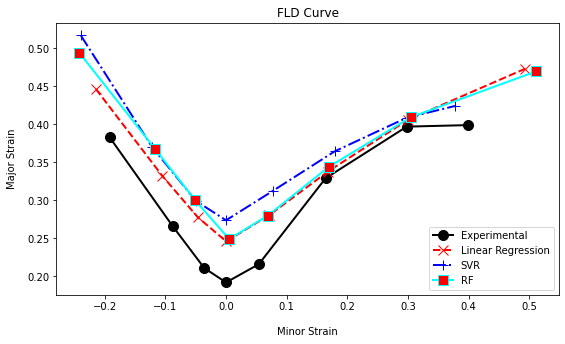

In [9]:
i=125
X=[df["LX1"].iloc[i],df["LX3"].iloc[i],df["LX2"].iloc[i],df['X0'].iloc[i],df["RX2"].iloc[i],df["RX3"].iloc[i],df["RX4"].iloc[i],df["RX1"].iloc[i]]
Y=[df["LY1"].iloc[i],df["LY3"].iloc[i],df["LY2"].iloc[i],df["Y0"].iloc[i],df["RY2"].iloc[i],df["RY3"].iloc[i],df["RY4"].iloc[i],df["RY1"].iloc[i]]
input=[df["Thickness"].iloc[i],df["Hardening_Exp"].iloc[i],df["Anisotropy"].iloc[i],df["Yield_Strength"].iloc[i],df["Total_Strain"].iloc[i]]
plot_fld(X,Y,input)

c:\Users\ansh2\Python3.10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


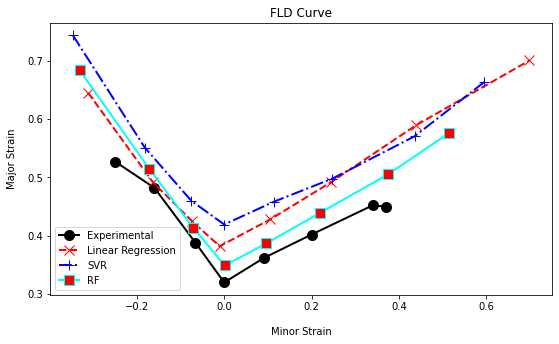

In [10]:
i=21
X=[df["LX1"].iloc[i],df["LX3"].iloc[i],df["LX2"].iloc[i],df['X0'].iloc[i],df["RX2"].iloc[i],df["RX3"].iloc[i],df["RX4"].iloc[i],df["RX1"].iloc[i]]
Y=[df["LY1"].iloc[i],df["LY3"].iloc[i],df["LY2"].iloc[i],df["Y0"].iloc[i],df["RY2"].iloc[i],df["RY3"].iloc[i],df["RY4"].iloc[i],df["RY1"].iloc[i]]
input=[df["Thickness"].iloc[i],df["Hardening_Exp"].iloc[i],df["Anisotropy"].iloc[i],df["Yield_Strength"].iloc[i],df["Total_Strain"].iloc[i]]
plot_fld(X,Y,input)